In [85]:
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

In [86]:
time_step = 1e-3
R = 5.1
C = 5e-3
num_steps = 200

In [87]:
lif3 = snn.Lapicque(R=R, C=C, time_step=time_step, threshold=0.5)

In [88]:
# Create a 1-D random spike train. Each element has a probability of 40% of firing.
spk_in = spikegen.rate_conv(torch.ones((num_steps)) * 0.40)

In [89]:
print(f"There are {int(sum(spk_in))} total spikes out of {len(spk_in)} time steps.")

There are 75 total spikes out of 200 time steps.


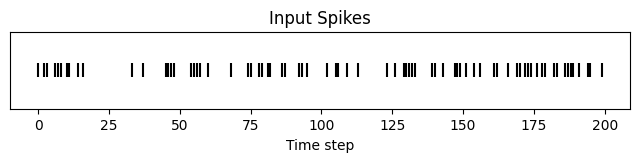

In [90]:
fig = plt.figure(facecolor="w", figsize=(8, 1))
ax = fig.add_subplot(111)

splt.raster(spk_in.reshape(num_steps, -1), ax, s=100, c="black", marker="|")
plt.title("Input Spikes")
plt.xlabel("Time step")
plt.yticks([])
plt.show()

In [91]:
# Initialize inputs and outputs
mem = torch.ones(1)*0.5
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]

# Neuron simulation
for step in range(num_steps):
  spk_out, mem = lif3(spk_in[step], mem)
  spk_rec.append(spk_out)
  mem_rec.append(mem)

# convert lists to tensors
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)




In [94]:
def plot_spk_mem_spk(spk_in, mem_rec, spk_out, title):
    # Set the figure size
    fig = plt.figure(facecolor="w", figsize=(12, 8))

    # Set up a GridSpec layout to control the subplot sizes
    gs = plt.GridSpec(3, 1, height_ratios=[1, 2, 1]) 

    # Plot input spikes
    ax1 = plt.subplot(gs[0])
    spike_times_in = [np.flatnonzero(spk_in)] 
    ax1.eventplot(spike_times_in, orientation='horizontal', colors='black', linelengths=1)
    ax1.set_ylabel("Input Spikes")
    ax1.set_xticks([])
    ax1.set_yticks([])

    # Plot membrane potential
    ax2 = plt.subplot(gs[1])
    ax2.plot(mem_rec, color='blue')
    ax2.set_ylabel("Membrane Potential (Umem)")
    ax2.set_ylim(0.0, 0.7)
    ax2.axhline(y=0.5, color='gray', linestyle='--') 

    # Plot output spikes
    ax3 = plt.subplot(gs[2])
    spike_times_out = [np.flatnonzero(spk_rec.squeeze())] 
    ax3.eventplot(spike_times_out, orientation='horizontal', colors='black', linelengths=1)
    ax3.set_xlabel("Time step")
    ax3.set_ylabel("Output Spikes")
    ax3.set_xticks([])
    ax3.set_yticks([])

    # Set the overall title
    plt.suptitle(title, fontsize=16)

    # Adjust the layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.subplots_adjust(hspace=0.5)
    plt.show()

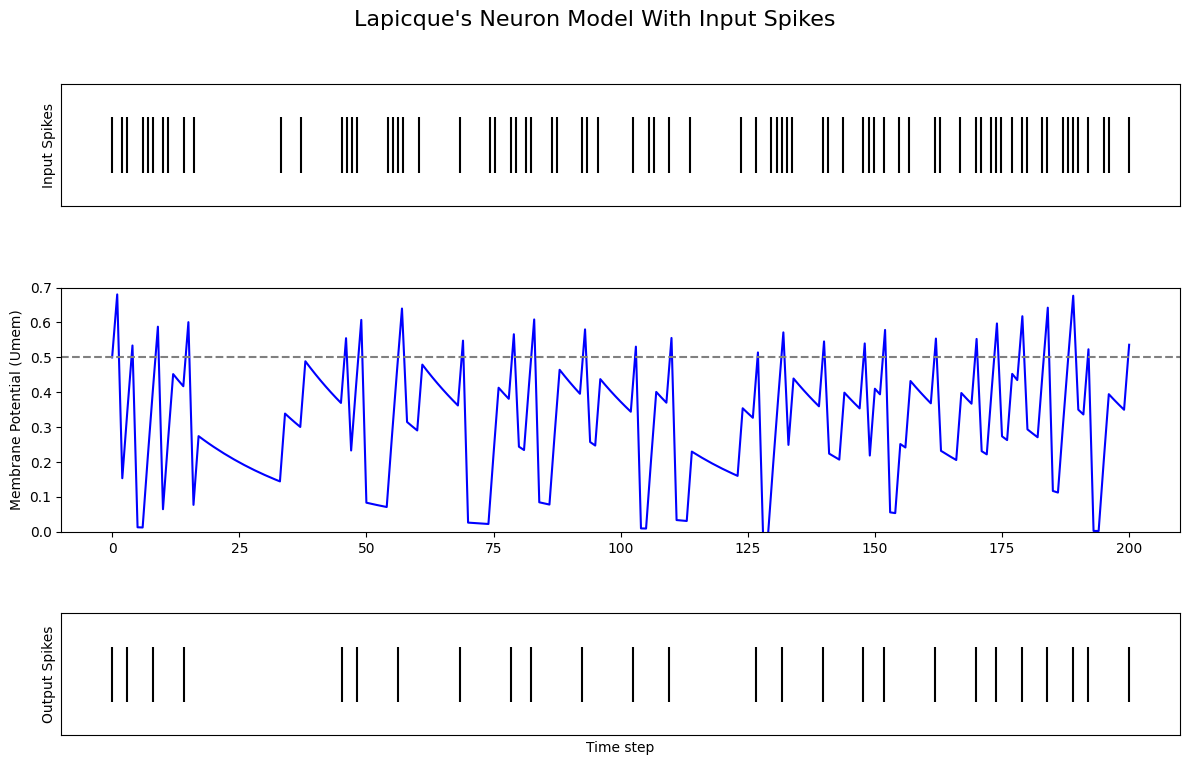

In [95]:
plot_spk_mem_spk(spk_in, mem_rec, spk_out, "Lapicque's Neuron Model With Input Spikes")

In [96]:
# Neuron with reset_mechanism set to "zero"
lif4 = snn.Lapicque(R=5.1, C=5e-3, time_step=1e-3, threshold=0.5, reset_mechanism="zero")

# Initialize inputs and outputs
spk_in = spikegen.rate_conv(torch.ones((num_steps)) * 0.40)
mem = torch.ones(1)*0.5
spk_out = torch.zeros(1)
mem_rec0 = [mem]
spk_rec0 = [spk_out]

# Neuron simulation
for step in range(num_steps):
  spk_out, mem = lif4(spk_in[step], mem)
  spk_rec0.append(spk_out)
  mem_rec0.append(mem)

# convert lists to tensors
mem_rec0 = torch.stack(mem_rec0)
spk_rec0 = torch.stack(spk_rec0)



In [97]:
import numpy as np
import matplotlib.pyplot as plt

def plot_reset_comparison(spk_in, mem_rec_subtraction, spk_out_subtraction, 
                          mem_rec_zero, spk_out_zero, title):
    # Set the figure size with constrained_layout=True
    fig = plt.figure(facecolor="w", figsize=(12, 8))

    # Set up a GridSpec layout to control the subplot sizes
    gs = plt.GridSpec(3, 2, height_ratios=[1, 2, 1], width_ratios=[1, 1], figure=fig)

    # Plot input spikes for both sets 
    ax_in_subtraction = fig.add_subplot(gs[0, 0])
    spike_times_in = [np.flatnonzero(spk_in)]
    ax_in_subtraction.eventplot(spike_times_in, orientation='horizontal', 
                                colors='black', linelengths=1)
    ax_in_subtraction.set_title("Reset by Subtraction")
    ax_in_subtraction.set_xticks([])
    ax_in_subtraction.set_yticks([])

    ax_in_zero = fig.add_subplot(gs[0, 1], sharey=ax_in_subtraction)
    ax_in_zero.eventplot(spike_times_in, orientation='horizontal', colors='black', 
                         linelengths=1)
    ax_in_zero.set_title("Reset to Zero")
    ax_in_zero.set_xticks([])
    ax_in_zero.set_yticks([])

    # Plot membrane potential for the reset by subtraction
    ax_mem_subtraction = fig.add_subplot(gs[1, 0])
    ax_mem_subtraction.plot(mem_rec_subtraction, color='blue')
    ax_mem_subtraction.axhline(y=0.5, color='gray', linestyle='--')
    ax_mem_subtraction.set_ylabel("Membrane Potential (Umem)")
    ax_mem_subtraction.set_xticks([])

    # Plot output spikes for the reset by subtraction
    ax_out_subtraction = fig.add_subplot(gs[2, 0])
    spike_times_out_subtraction = [np.flatnonzero(spk_out_subtraction)]
    ax_out_subtraction.eventplot(spike_times_out_subtraction, orientation='horizontal', 
                                 colors='black', linelengths=1)
    ax_out_subtraction.set_xlabel("Time step")
    ax_out_subtraction.set_yticks([])

    # Plot membrane potential for the reset to zero
    ax_mem_zero = fig.add_subplot(gs[1, 1], sharey=ax_mem_subtraction)
    ax_mem_zero.plot(mem_rec_zero, color='blue')
    ax_mem_zero.axhline(y=0.5, color='gray', linestyle='--')
    ax_mem_zero.set_xticks([])

    # Plot output spikes for the reset to zero
    ax_out_zero = fig.add_subplot(gs[2, 1], sharey=ax_out_subtraction)
    spike_times_out_zero = [np.flatnonzero(spk_out_zero)]
    ax_out_zero.eventplot(spike_times_out_zero, orientation='horizontal', 
                          colors='black', linelengths=1)
    ax_out_zero.set_xlabel("Time step")
    ax_out_zero.set_yticks([])

    # Set the overall title for the figure
    plt.suptitle(title, fontsize=16)

    # Show the plot without calling tight_layout
    plt.show()


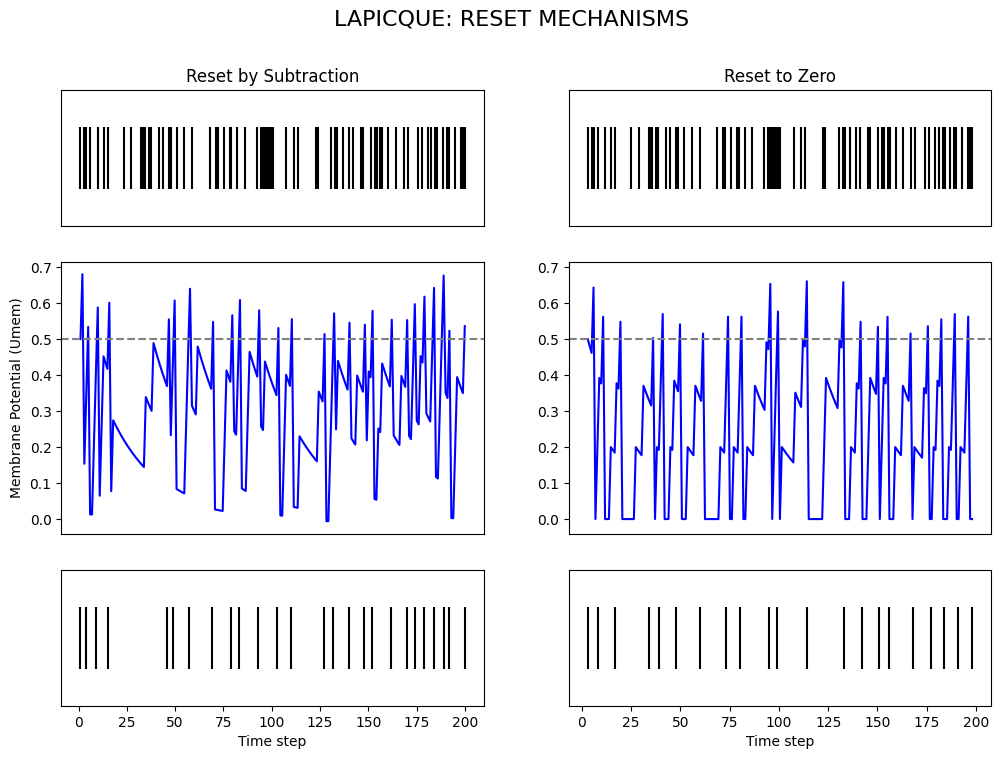

In [98]:
plot_reset_comparison(spk_in, mem_rec, spk_rec, mem_rec0, spk_rec0,
                      "LAPICQUE: RESET MECHANISMS")